In [1]:
%matplotlib ipympl
from models import *
from impedance.models.circuits import CustomCircuit
import numpy as np
import matplotlib.pyplot as plt
from mpmath import * 

## Generate The Data

In [ ]:
ratio_range=np.linspace(1.2,10,50)
Q=6.61e-4
alpha=1

R1=1015.29
delta1=0.2063
R2=674.915
freq_list=np.logspace(-2,2,500)
mp.dps=200

theta_dip_list0=[]
theta_dip_list1=[]
theta_dip_list2=[]

for profile in ["TLMtwo","TLMlinnew","TLMilinnew"]:
    for alpha in [1,0.9,0.8]:
        for R1 in R2*ratio_range:
            if profile=="TLMtwo":
                cmodel=CustomCircuit(initial_guess=[R1,R1*Q,R2*Q,delta1,alpha],circuit=profile)
            else:
                cmodel=CustomCircuit(initial_guess=[R1,R1*Q,R2*Q,alpha],circuit=profile)
            
            zexp=cmodel.predict(frequencies=freq_list)
            dip_angle=alpha*45-np.min(-np.angle(zexp,deg=True))
            theta_dip_list2.append(dip_angle)
        theta_dip_list1.append(theta_dip_list2)
        theta_dip_list2=[]
    theta_dip_list0.append(theta_dip_list1)
    theta_dip_list1=[]

## write to a .json file

In [3]:
import json
theta_list = theta_dip_list0
file_path = "theta_data_all.json"
json_data = json.dumps(theta_list)

with open(file_path, "w") as file:
    file.write(json_data)

## Read from the .json file

In [5]:
import json
file_path = "theta_data_all.json"

with open(file_path, "r") as file:
    json_data = file.read()

theta_list=json.loads(json_data)

## Plot the three plots, as will be in the paper

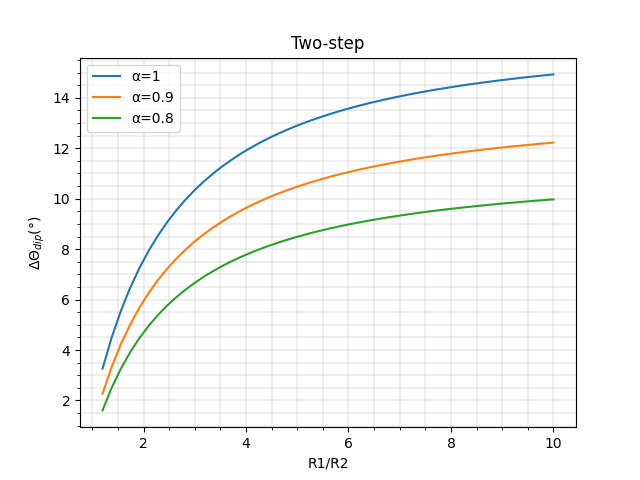

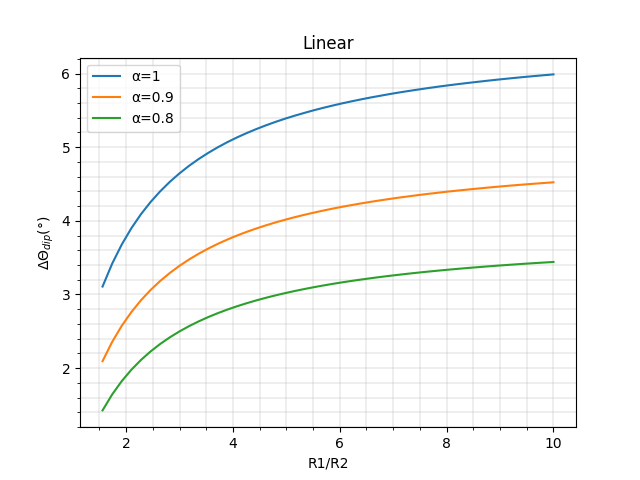

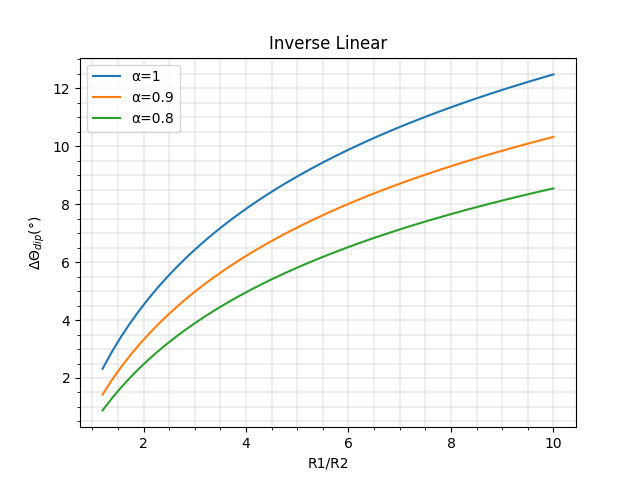

In [37]:
from matplotlib.ticker import MultipleLocator
ratio_range=np.linspace(1.2,10,50)

# ax=[]
fig,axtwo=plt.subplots()
fig1,axlin=plt.subplots()
fig2,axilin=plt.subplots()
x=ratio_range

crap_till_lin=2

for idx1,ax,fg,title in zip([0,1,2],(axtwo,axlin,axilin),(fig,fig1,fig2),("Two-step","Linear","Inverse Linear")):
    for idx2,a in zip([0,1,2],[1,0.9,0.8]):
        if(idx1==1):
            ax.plot(ratio_range[crap_till_lin:],theta_list[idx1][idx2][crap_till_lin:],label=f"α={a}")
        else:
            ax.plot(ratio_range,theta_list[idx1][idx2],label=f"α={a}")
        ax.xaxis.set_minor_locator(MultipleLocator(0.5))
        ax.yaxis.set_minor_locator(MultipleLocator(0.5))
        ax.legend()
        ax.grid(which="both",linewidth=0.3)
        ax.minorticks_on()
        ax.set_xlabel("R1/R2")
        ax.set_ylabel("$\Delta \Theta_{dip} (\degree)$")
        ax.set_title(title)
        fg.savefig(f"{title}.png",dpi=300)
   
# axx.set_xticks(np.arange(0, 10.5, 0.5))
# axx.set_yticks(np.arange(0, 12, 1))